In [1]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image
from stainNorm import *
from transFDA import *


/root/miniconda3/envs/paul/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


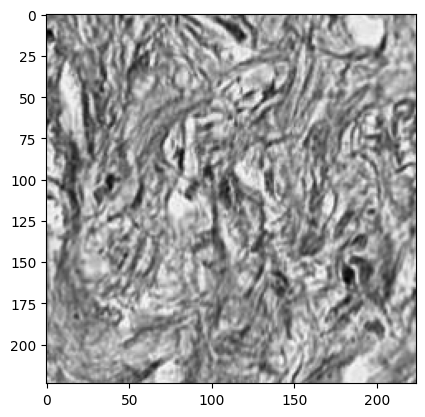

In [2]:
target_path='target.tif'
tar_img=cv2.cvtColor(cv2.imread(target_path), cv2.COLOR_BGR2GRAY)
plt.imshow(tar_img,cmap='gray')

In [3]:
source_dir='demo_img/ori/'
save_dir='demo_img/analysis/'
source_img=cv2.cvtColor(cv2.imread('demo_img/ori/MUS-AADHGYVW.tif'), cv2.COLOR_BGR2GRAY)

In [6]:
stain_dir='demo_img/stain/'
stain_img=cv2.cvtColor(cv2.imread('demo_img/stain/MUS-AADHGYVW.tif'), cv2.COLOR_BGR2GRAY)
stain_fft=np.fft.fft2(np.asarray(stain_img,np.float32))
fda_dir='demo_img/fda/'
fda_img=cv2.cvtColor(cv2.imread('demo_img/fda/MUS-AADHGYVW.tif'), cv2.COLOR_BGR2GRAY)
fda_fft=np.fft.fft2(np.asarray(fda_img,np.float32))

True

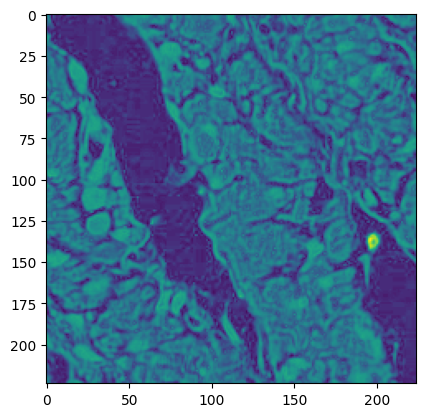

In [8]:
differ_img=np.asarray(source_img)-np.asarray(stain_img)
plt.imshow(differ_img)
cv2.imwrite('./overall/stain_source_differ.png',differ_img)

True

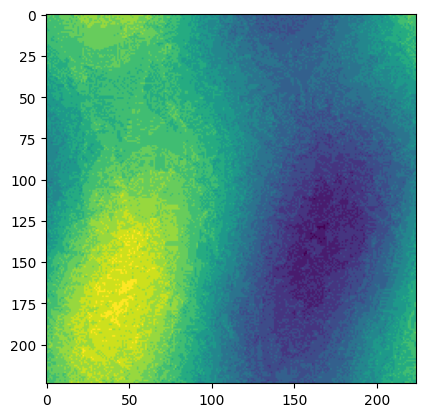

In [6]:
differ_fda_img=np.asarray(source_img)-np.asarray(fda_img)
plt.imshow(differ_fda_img)
cv2.imwrite('./overall/fda_source_differ.png',differ_fda_img)

True

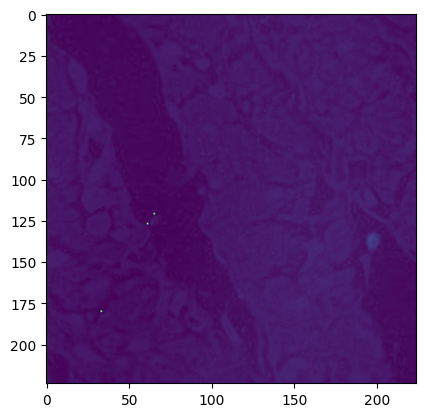

In [7]:
differ_fda_stain_img=np.asarray(fda_img)-np.asarray(stain_img)
plt.imshow(differ_fda_stain_img)
cv2.imwrite('./overall/fda_stain_differ.png',differ_fda_stain_img)

In [8]:
def trans_in_fourier_by_amplitude_gray(src,tar,anchor=None,L=0,lamda=1):
    """
    This compute the amplitude exchange,

    anchor: the center of change rectangle
    L: the ratio of change area 
    """
    src=np.fft.fftshift(src)
    tar=np.fft.fftshift(tar)
    src_amp,src_pha=np.abs(src),np.angle(src)
    tar_amp,tar_pha=np.abs(tar),np.angle(tar)
    if anchor is None:
        # default is the center point
        anchor=(src.shape[0]//2,src.shape[1]//2)
    if L == 0:
        # Not explicit the ratio, then whole exchange
        L=0.5
    h,w=np.floor(src.shape[0]*L).astype(int),np.floor(src.shape[1]*L).astype(int)
    a=max(anchor[0]-h,0)
    b=min(anchor[0]+h,src_amp.shape[1])
    c=max(anchor[1]-w,0)
    d=min(anchor[1]+w,src_amp.shape[1])
    # print(f'The transfer ares size is {b-a,d-c}')
    src_amp[:,a:b,c:d]=lamda*tar_amp[:,a:b,c:d]+(1-lamda)*src_amp[:,a:b,c:d]
    new_src_fft=np.fft.ifftshift(src_amp*np.exp(1j*src_pha))
    # new_src_fft=src_amp*np.exp(1j*src_pha)
    return  new_src_fft

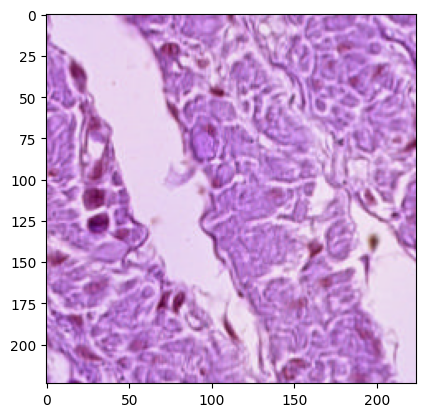

In [13]:
fda_fft_now=trans_in_fourier_by_amplitude(np.fft.fft2(cv2.imread('demo_img/ori/MUS-AADHGYVW.tif').transpose(2,0,1)),
                                          np.fft.fft2(cv2.imread(target_path).transpose(2,0,1)),L=0.005)

new_img=np.real(np.fft.ifft2(fda_fft_now).transpose((1,2,0)))
imin = new_img.min()
imax = new_img.max()
fda_img_now = (255 * (new_img - imin) / (imax - imin)).astype("uint8")
plt.imshow(fda_img_now)
plt.show()


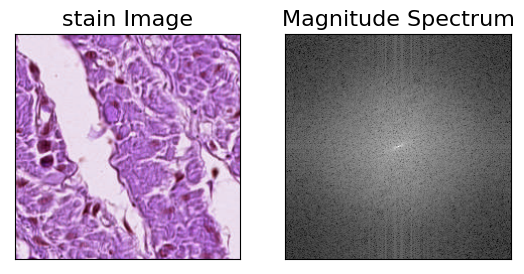

In [11]:
# Load the image
img = cv2.imread('demo_img/stain/MUS-AADHGYVW.tif')

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply FFT
f = np.fft.fft2(gray)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

# Analyze the frequency domain image
power_spectrum = np.abs(fshift)**2
orientation = np.angle(fshift)
cv2.imwrite('paper_img/figure_2_0.png',magnitude_spectrum)
# Visualize the analyzed information
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('stain Image',fontsize=16), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum',fontsize=16), plt.xticks([]), plt.yticks([])
plt.savefig('./overall/stain_fft.png',bbox_inches='tight')


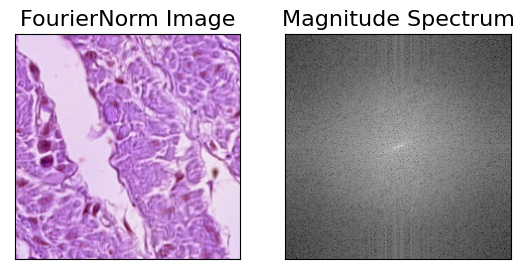

In [14]:
# Load the image
img = np.asarray(fda_img_now,np.uint8)

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply FFT
f = np.fft.fft2(gray)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

# Analyze the frequency domain image
power_spectrum = np.abs(fshift)**2
orientation = np.angle(fshift)
cv2.imwrite('paper_img/figure_2_1.png',magnitude_spectrum)
# Visualize the analyzed information
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('FourierNorm Image',fontsize=16), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum',fontsize=16), plt.xticks([]), plt.yticks([])
plt.savefig('./overall/fda_fft.png',bbox_inches='tight')


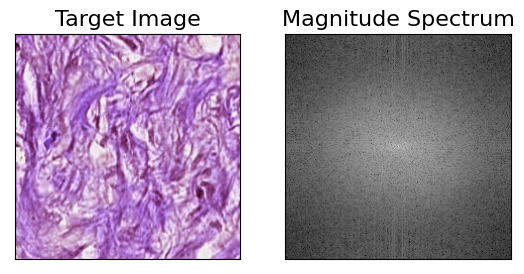

In [15]:
# Load the image
img = cv2.imread(target_path)

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply FFT
f = np.fft.fft2(gray)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

# Analyze the frequency domain image
power_spectrum = np.abs(fshift)**2
orientation = np.angle(fshift)
cv2.imwrite('paper_img/figure_2_3.png',magnitude_spectrum)
# Visualize the analyzed information
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Target Image',fontsize=16), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum',fontsize=16), plt.xticks([]), plt.yticks([])
plt.savefig('./overall/target_fft.png',bbox_inches='tight')


In [1]:
# Load the image
img = cv2.imread('/home/windsky/Code/FPtheta/demo_img/ori/MUS-AADHGYVW.tif')

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply FFT
f = np.fft.fft2(gray)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

# Analyze the frequency domain image
power_spectrum = np.abs(fshift)**2
orientation = np.angle(fshift)

# Visualize the analyzed information
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Source Image',fontsize=16), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum',fontsize=16), plt.xticks([]), plt.yticks([])
plt.savefig('./overall/source_fft.png',bbox_inches='tight')


NameError: name 'cv2' is not defined

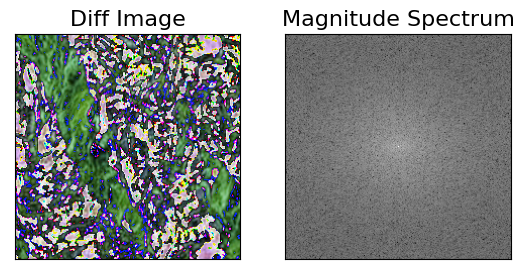

In [34]:
img=cv2.imread('/home/windsky/Code/FPtheta/demo_img/ori/MUS-AADHGYVW.tif')-cv2.imread(target_path)
# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply FFT
f = np.fft.fft2(gray)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

# Analyze the frequency domain image
power_spectrum = np.abs(fshift)**2
orientation = np.angle(fshift)

# Visualize the analyzed information
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Diff Image',fontsize=16), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum',fontsize=16), plt.xticks([]), plt.yticks([])
plt.savefig('./overall/source_target.png',bbox_inches='tight')

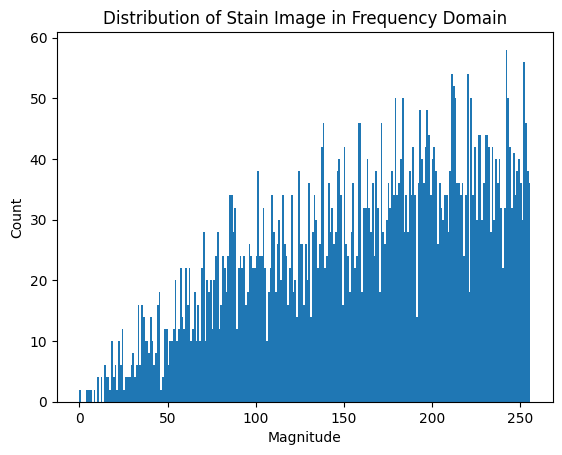

<Figure size 640x480 with 0 Axes>

In [15]:
# Load the image
img = cv2.imread('/home/windsky/Code/FPtheta/demo_img/stain/MUS-AADHGYVW.tif')

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply FFT
f = np.fft.fft2(gray)
fshift = np.fft.fftshift(f)
magnitude_spectrum_3 = np.abs(fshift)

# Plot the distribution of the image in the frequency domain using a histogram
plt.hist(magnitude_spectrum_3.ravel(), bins=256, range=(0,256))
plt.title('Distribution of Stain Image in Frequency Domain')
plt.xlabel('Magnitude')
plt.ylabel('Count')
plt.show()
plt.savefig('./overall/stain_distribution.png')

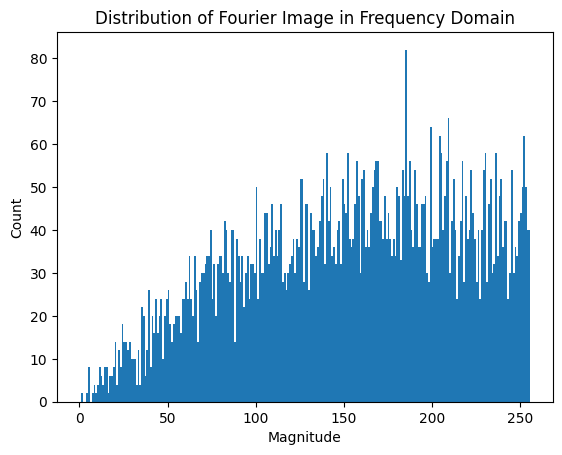

<Figure size 640x480 with 0 Axes>

In [16]:
# Load the image
img = fda_img_now

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply FFT
f = np.fft.fft2(gray)
fshift = np.fft.fftshift(f)
magnitude_spectrum_2 = np.abs(fshift)

# Plot the distribution of the image in the frequency domain using a histogram
plt.hist(magnitude_spectrum_2.ravel(), bins=256, range=(0,256))
plt.title('Distribution of Fourier Image in Frequency Domain')
plt.xlabel('Magnitude')
plt.ylabel('Count')
plt.show()
plt.savefig('./overall/fda_distribution.png')

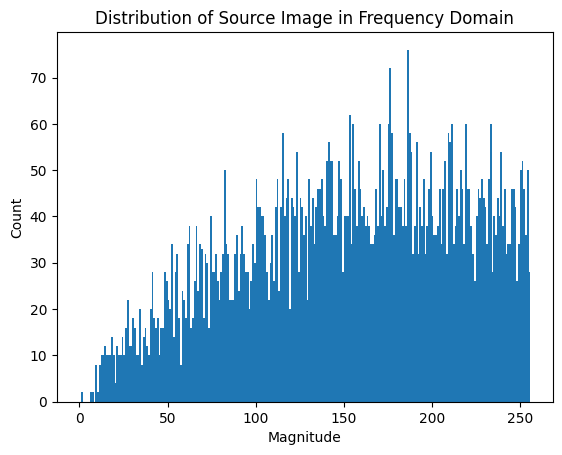

<Figure size 640x480 with 0 Axes>

In [17]:
# Load the image
img = cv2.imread('/home/windsky/Code/FPtheta/demo_img/ori/MUS-AADHGYVW.tif')

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply FFT
f = np.fft.fft2(gray)
fshift = np.fft.fftshift(f)
magnitude_spectrum_1 = np.abs(fshift)

# Plot the distribution of the image in the frequency domain using a histogram
plt.hist(magnitude_spectrum_1.ravel(), bins=256, range=(0,256))
plt.title('Distribution of Source Image in Frequency Domain')
plt.xlabel('Magnitude')
plt.ylabel('Count')
plt.show()
plt.savefig('./overall/ori_distribution.png')


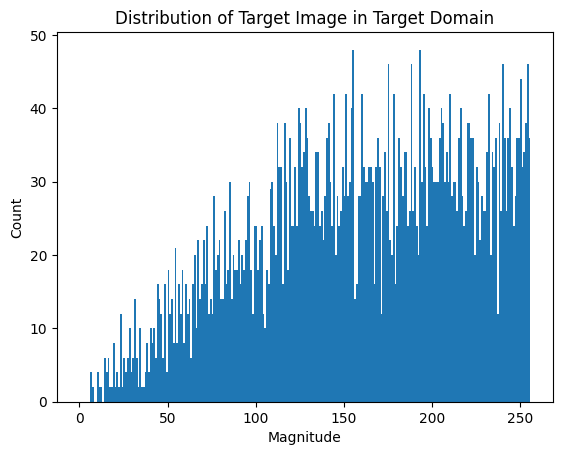

<Figure size 640x480 with 0 Axes>

In [18]:
# Load the image
img = cv2.imread(target_path)

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply FFT
f = np.fft.fft2(gray)
fshift = np.fft.fftshift(f)
magnitude_spectrum_0 = np.abs(fshift)

# Plot the distribution of the image in the frequency domain using a histogram
plt.hist(magnitude_spectrum_0.ravel(), bins=256, range=(0,256))
plt.title('Distribution of Target Image in Target Domain')
plt.xlabel('Magnitude')
plt.ylabel('Count')
plt.show()
plt.savefig('./overall/target_distribution.png')

In [61]:
from scipy.stats import entropy
kl_divergence = entropy(magnitude_spectrum_2.flatten(), magnitude_spectrum_0.flatten())
kl_divergence

0.32357264275865144

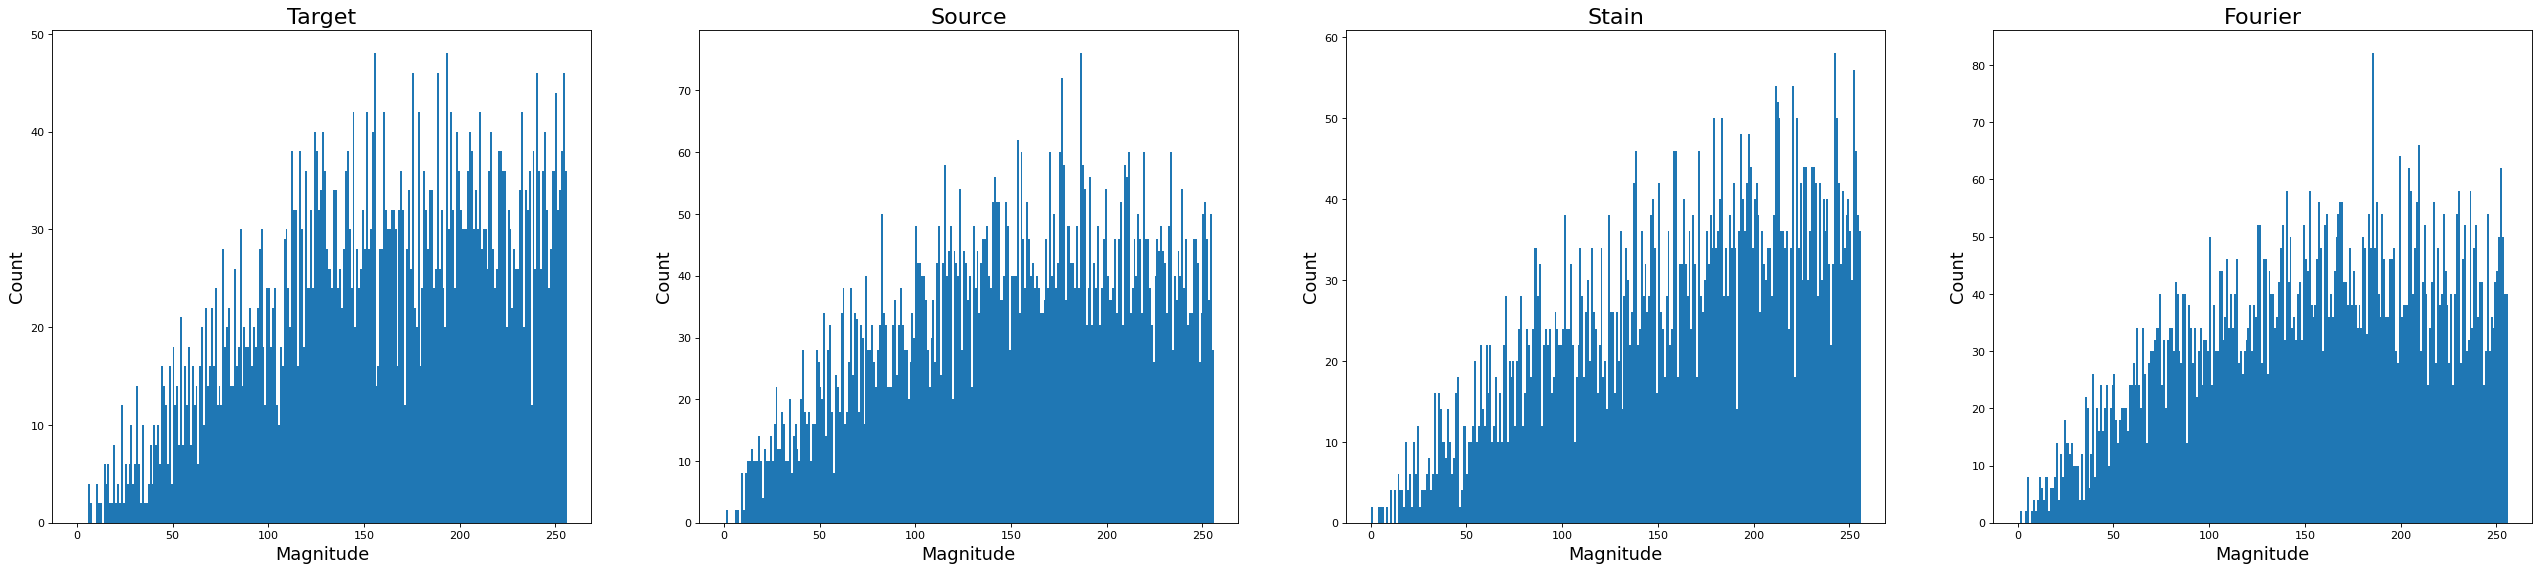

In [51]:
fig=plt.figure(figsize=(40, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(141),plt.hist(magnitude_spectrum_0.ravel(), bins=256, range=(0,256))
plt.title('Target',fontsize=20),plt.xlabel('Magnitude',fontsize=16),plt.ylabel('Count',fontsize=16)
plt.subplot(142),plt.hist(magnitude_spectrum_1.ravel(), bins=256, range=(0,256))
plt.title('Source',fontsize=20),plt.xlabel('Magnitude',fontsize=16),plt.ylabel('Count',fontsize=16)
plt.subplot(144),plt.hist(magnitude_spectrum_2.ravel(), bins=256, range=(0,256))
plt.title('Fourier',fontsize=20),plt.xlabel('Magnitude',fontsize=16),plt.ylabel('Count',fontsize=16)
plt.subplot(143),plt.hist(magnitude_spectrum_3.ravel(), bins=256, range=(0,256))
plt.title('Stain',fontsize=20),plt.xlabel('Magnitude',fontsize=16),plt.ylabel('Count',fontsize=16)
# plt.hist(magnitude_spectrum_0.ravel(), bins=256, range=(0,256))
# plt.hist(magnitude_spectrum_1.ravel(), bins=256, range=(0,256))
# plt.hist(magnitude_spectrum_2.ravel(), bins=256, range=(0,256))
# plt.hist(magnitude_spectrum_3.ravel(), bins=256, range=(0,256))
# plt.title('Distribution of Image in Frequency Domain')
# plt.xlabel('Magnitude')
# plt.ylabel('Count')
# plt.legend(['Target','Source','Fourier','Stain'])
plt.savefig('./overall/distribution.png',bbox_inches='tight')

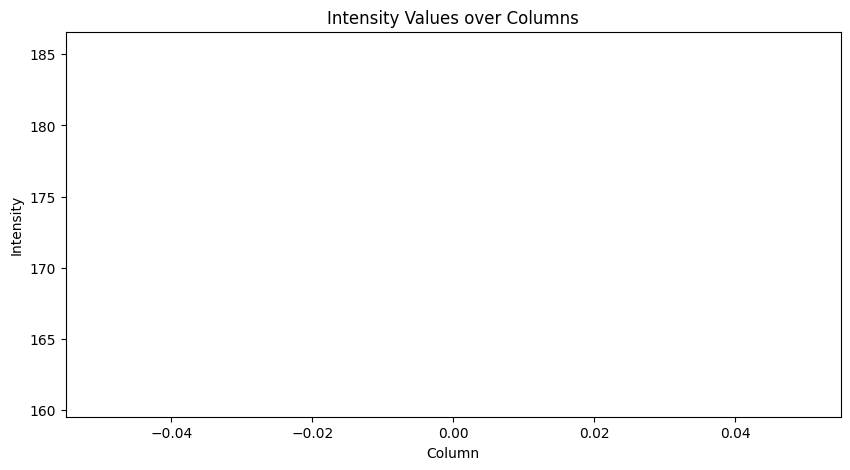

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Load image
img = Image.open("/home/windsky/Code/FPtheta/demo_img/stain/MUS-AADHGYVW.tif")

# Convert image to grayscale
img_gray = img.convert("L")

# Convert image to numpy array
img_array = np.array(img_gray)

# Plot the intensity values of each row
f, ax = plt.subplots(figsize=(10, 5))
for i in range(img_array.shape[0]):
    ax.plot(img_array[i, :])
ax.set_xlabel("Column")
ax.set_ylabel("Intensity")
ax.set_title("Intensity Values over Columns")
plt.show()

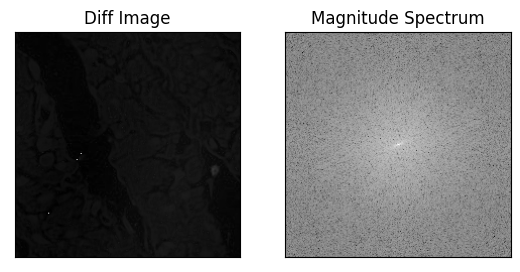

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img_fft = np.asarray(fda_img_now,np.uint8)
img_stain=cv2.imread('/home/windsky/Code/FPtheta/demo_img/stain/MUS-AADHGYVW.tif')
# Convert to grayscale
gray_fft = cv2.cvtColor(img_fft, cv2.COLOR_BGR2GRAY)
gray_stain=cv2.cvtColor(img_stain, cv2.COLOR_BGR2GRAY)
# Apply FFT
f_fft = np.fft.fft2(gray_fft)
f_fft = np.fft.fftshift(f_fft)
f_stain=np.fft.fft2(gray_stain)
f_stain=np.fft.fftshift(f_stain)
# magnitude_spectrum = np.abs(f_fft)-np.abs(f_stain)
magnitude_spectrum = 20*np.log(np.abs(np.abs(f_fft)-np.abs(f_stain)))

# Analyze the frequency domain image
power_spectrum = np.abs(f_fft-f_stain)**2
orientation = np.angle(f_fft-f_stain)

# Visualize the analyzed information
plt.subplot(121),plt.imshow(differ_fda_stain_img, cmap = 'gray')
plt.title('Diff Image',fontsize=16), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum',fontsize=16), plt.xticks([]), plt.yticks([])

plt.savefig('./overall/differ_fda_stain_img.png',bbox_inches='tight')


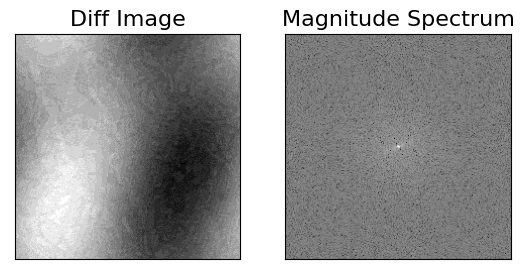

In [35]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img_fft = np.asarray(fda_img_now,np.uint8)
img_stain=cv2.imread('/home/windsky/Code/FPtheta/demo_img/ori/MUS-AADHGYVW.tif')
# Convert to grayscale
gray_fft = cv2.cvtColor(img_fft, cv2.COLOR_BGR2GRAY)
gray_stain=cv2.cvtColor(img_stain, cv2.COLOR_BGR2GRAY)
# Apply FFT
f_fft = np.fft.fft2(gray_fft)
f_fft = np.fft.fftshift(f_fft)
f_stain=np.fft.fft2(gray_stain)
f_stain=np.fft.fftshift(f_stain)
# magnitude_spectrum = np.abs(f_fft)-np.abs(f_stain)
magnitude_spectrum = 20*np.log(np.abs(np.abs(f_fft)-np.abs(f_stain)))

# Analyze the frequency domain image
power_spectrum = np.abs(f_fft-f_stain)**2
orientation = np.angle(f_fft-f_stain)

# Visualize the analyzed information
plt.subplot(121),plt.imshow(differ_fda_img, cmap = 'gray')
plt.title('Diff Image',fontsize=16), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum',fontsize=16), plt.xticks([]), plt.yticks([])
plt.savefig('./overall/differ_fda_img.png',bbox_inches='tight')


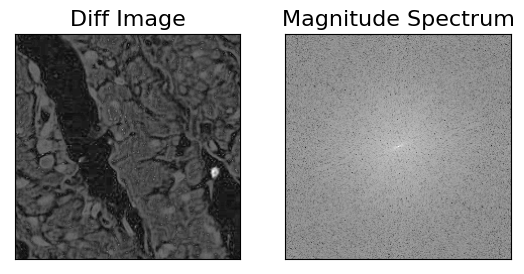

In [36]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img_fft = cv2.imread('/home/windsky/Code/FPtheta/demo_img/stain/MUS-AADHGYVW.tif')
img_stain=cv2.imread('/home/windsky/Code/FPtheta/demo_img/ori/MUS-AADHGYVW.tif')
# Convert to grayscale
gray_fft = cv2.cvtColor(img_fft, cv2.COLOR_BGR2GRAY)
gray_stain=cv2.cvtColor(img_stain, cv2.COLOR_BGR2GRAY)
# Apply FFT
f_fft = np.fft.fft2(gray_fft)
f_fft = np.fft.fftshift(f_fft)
f_stain=np.fft.fft2(gray_stain)
f_stain=np.fft.fftshift(f_stain)
# magnitude_spectrum = np.abs(f_fft)-np.abs(f_stain)
magnitude_spectrum = 20*np.log(np.abs(np.abs(f_fft)-np.abs(f_stain)))

# Analyze the frequency domain image
power_spectrum = np.abs(f_fft-f_stain)**2
orientation = np.angle(f_fft-f_stain)

# Visualize the analyzed information
plt.subplot(121),plt.imshow(differ_img, cmap = 'gray')
plt.title('Diff Image',fontsize=16), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum',fontsize=16), plt.xticks([]), plt.yticks([])
plt.savefig('./overall/differ_img.png',bbox_inches='tight')


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
# Load the image
fda_dir='/home/windsky/Code/FPtheta/demo_img/fda/'
stain_dir='/home/windsky/Code/FPtheta/demo_img/stain/'
ori_dir='/home/windsky/Code/FPtheta/demo_img/ori/'
target_path='data/NCT-CRC-HE-100K/STR/STR-AADLAKYL.tif'

# Convert to grayscale
target_gray = cv2.cvtColor(cv2.imread(target_path), cv2.COLOR_BGR2GRAY)
target_fft = np.fft.fft2(target_gray)
# save the target fft image
cv2.imwrite('./overall/target_fft.jpg', 20*np.log(np.abs(np.fft.fftshift(target_fft))))
cv2.imwrite('./overall/target.jpg', cv2.imread(target_path))

# Apply FFT on stain image and compute the difference of target
for image in os.listdir(stain_dir):
    img_stain=cv2.imread(stain_dir+image)
    gray_stain=cv2.cvtColor(img_stain, cv2.COLOR_BGR2GRAY)
    f_stain=np.fft.fft2(gray_stain)
    f_stain=np.fft.fftshift(f_stain)
    diff=np.abs(f_stain)-np.abs(target_fft)
    # save the stain fft image
    image=image.split('.')[0]+'.jpg'
    image_diff=image.split('.')[0]+'_diff.jpg'
    cv2.imwrite('./overall/stain_fft/'+image, 20*np.log(np.abs(f_stain)))
    cv2.imwrite('./overall/stain_fft/'+image_diff, 20*np.log(np.abs(diff)))

# Apply FFT on fda image and compute the difference of target
for image in os.listdir(fda_dir):
    img_fft=cv2.imread(fda_dir+image)
    gray_fft=cv2.cvtColor(img_fft, cv2.COLOR_BGR2GRAY)
    f_fft = np.fft.fft2(gray_fft)
    f_fft = np.fft.fftshift(f_fft)
    diff=np.abs(f_fft)-np.abs(target_fft)
    # save the fda fft image
    image=image.split('.')[0]+'.jpg'
    image_diff=image.split('.')[0]+'_diff.jpg'
    cv2.imwrite('./overall/fda_fft/'+image, 20*np.log(np.abs(f_fft)))
    cv2.imwrite('./overall/fda_fft/'+image_diff, 20*np.log(np.abs(diff)))

# Apply FFT on ori image and compute the difference of target
for image in os.listdir(ori_dir):
    img_ori=cv2.imread(ori_dir+image)
    gray_ori=cv2.cvtColor(img_ori, cv2.COLOR_BGR2GRAY)
    f_ori = np.fft.fft2(gray_ori)
    f_ori = np.fft.fftshift(f_ori)
    diff=np.abs(f_ori)-np.abs(target_fft)
    # save the ori fft image
    image=image.split('.')[0]+'.jpg'
    image_diff=image.split('.')[0]+'_diff.jpg'
    cv2.imwrite('./overall/ori_fft/'+image, 20*np.log(np.abs(f_ori)))
    cv2.imwrite('./overall/ori_fft/'+image_diff, 20*np.log(np.abs(diff)))

# Differentiate the fda fft image and stain fft image
for image in os.listdir('/home/windsky/Code/FPtheta/overall/fda_fft/'):
    if image.split('.')[1] =='tif':
        continue
    img_fft=cv2.imread('/home/windsky/Code/FPtheta/overall/fda_fft/'+image)
    # gray_fft=cv2.cvtColor(img_fft, cv2.COLOR_BGR2GRAY)
    img_stain=cv2.imread('/home/windsky/Code/FPtheta/overall/stain_fft/'+image)
    # gray_stain=cv2.cvtColor(img_stain, cv2.COLOR_BGR2GRAY)
    diff=img_fft-img_stain
    # image=image.split('.')[0]+'.jpg'
    image_diff=image.split('.')[0]+'_diff.jpg'
    cv2.imwrite('./overall/fda_stain/'+image_diff, diff)



In [ ]:
# fft element analysis

In [ ]:
# trainable mask analysis

In [ ]:
# performance of different method

In [5]:
# mask demo image
import cv2
import numpy as np

# Generate random pixel values
image = np.random.randint(0, 256, (256, 256), dtype=np.uint8)

# Save the image
cv2.imwrite('mask.png', image)
nag_image=255-image
cv2.imwrite('nag_mask.png',nag_image)



True